In [1]:
# Install if needed (Colab usually has them)
!pip install scikit-learn matplotlib seaborn joblib

# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import os

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Create folder to store outputs
os.makedirs("outputs", exist_ok=True)
print("Output folder created")


Output folder created


In [4]:
digits = load_digits()
X = digits.data
y = digits.target

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1797, 64)
Shape of y: (1797,)


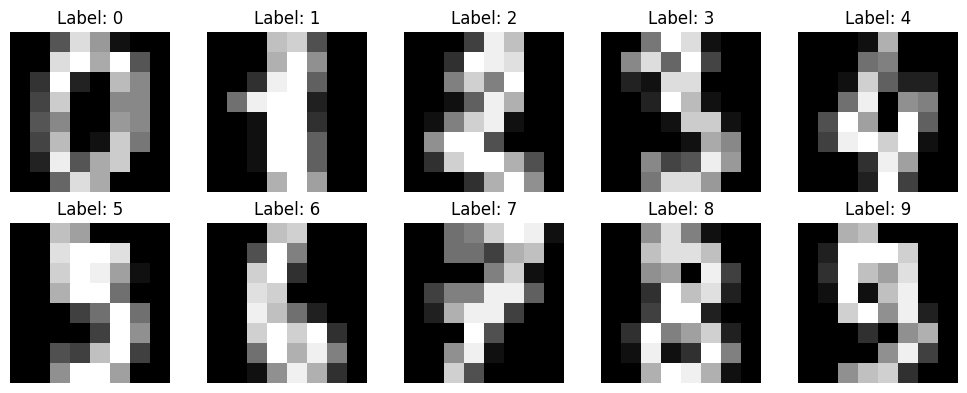

In [6]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("outputs/sample_digits.png")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (1437, 64)
Testing size: (360, 64)


In [10]:
k_values = [3,5,7,9]
accuracy_scores = []

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    accuracy_scores.append(scores.mean())

# Save results
results_df = pd.DataFrame({
    "K Value": k_values,
    "Cross Val Accuracy": accuracy_scores
})

results_df.to_csv("outputs/k_accuracy_results.csv", index=False)
results_df


,K Value,Cross Val Accuracy
0,3,0.971453
1,5,0.974930
2,7,0.969362
3,9,0.967274


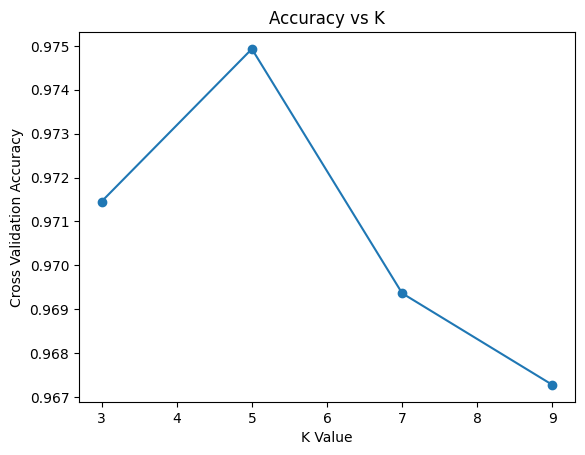

In [12]:
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Cross Validation Accuracy")
plt.title("Accuracy vs K")
plt.savefig("outputs/accuracy_vs_k.png")
plt.show()


In [14]:
best_k = k_values[np.argmax(accuracy_scores)]
print("Best K:", best_k)

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

final_pipeline.fit(X_train, y_train)

# Save model
joblib.dump(final_pipeline, "outputs/final_knn_model.pkl")


Best K: 5


['outputs/final_knn_model.pkl']

In [16]:
y_pred = final_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Save accuracy
with open("outputs/final_accuracy.txt", "w") as f:
    f.write(f"Final Test Accuracy: {accuracy}")


Test Accuracy: 0.9638888888888889


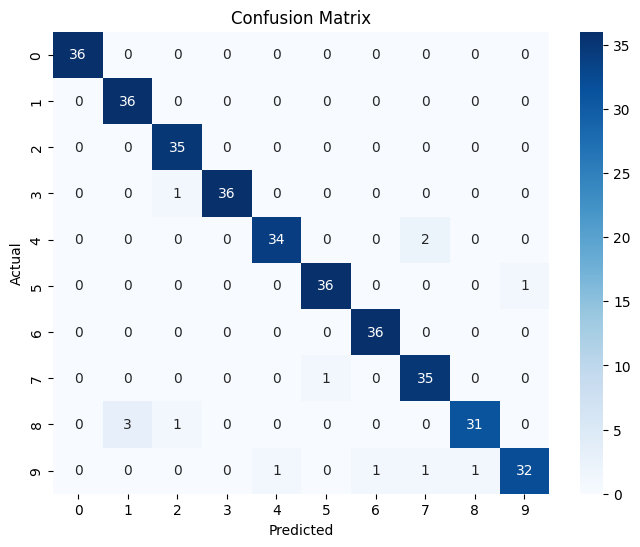

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("outputs/confusion_matrix.png")
plt.show()


In [20]:
report = classification_report(y_test, y_pred)

print(report)

with open("outputs/classification_report.txt", "w") as f:
    f.write(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      1.00      0.96        36
           2       0.95      1.00      0.97        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       0.97      0.97      0.97        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       0.97      0.89      0.93        35
           9       0.97      0.89      0.93        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



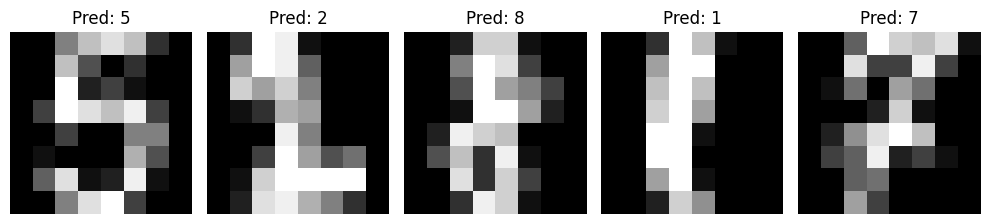

In [22]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("outputs/sample_predictions.png")
plt.show()
